In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(
    'compas-scores.csv',
    usecols=[
        'sex',
        'age',
        'race',
        'juv_fel_count', 
        'juv_misd_count',
        'juv_other_count', 
        'priors_count', 
        'days_b_screening_arrest',
        'c_jail_in', 
        'c_jail_out',
        'c_offense_date',
        'c_arrest_date', 
        'c_days_from_compas', 
        'c_charge_degree',
        'c_charge_desc', 
        'is_recid'],
    parse_dates=[
        'c_jail_in', 
        'c_jail_out', 
        'c_offense_date', 
        'c_arrest_date'])
df = df[df['c_days_from_compas'] <= 10]
df['c_days_in_jail'] = (df['c_jail_out'] - df['c_jail_in']).dt.days.fillna(0).astype(int)

In [3]:
df.head()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,c_days_in_jail
0,Male,69,Other,0,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,2013-08-13,NaT,1.0,F,Aggravated Assault w/Firearm,0,0
2,Male,34,African-American,0,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,2013-01-26,NaT,1.0,F,Felony Battery w/Prior Convict,1,10
3,Male,24,African-American,0,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,2013-04-13,NaT,1.0,F,Possession of Cocaine,1,1
4,Male,23,African-American,0,1,0,1,NaN,NaT,NaT,2013-01-12,NaT,1.0,F,Possession of Cannabis,0,0
6,Male,44,Other,0,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,2013-11-30,NaT,0.0,M,Battery,0,1


In [5]:
df['c_charge_desc'].value_counts().to_csv('lol.cvs')
df = df.applymap(lambda x: x.lower().strip() if type(x) == str else x)
df['c_charge_desc'].value_counts().to_csv('records_check.csv.csv')

In [6]:
df = pd.get_dummies(df)

In [7]:
#Drop date columns & columns with datatype float
df.drop([
        'c_jail_in', 
        'c_jail_out', 
        'c_offense_date', 
        'c_arrest_date',
'days_b_screening_arrest',
        'c_days_from_compas'],
    axis='columns',
    inplace=True
)

In [8]:
for col in df:
    count = len(df[col]) - df[col].count()
    if count:
        print(col, count)

In [9]:
#classify by race - keep white
df.drop(['race_asian',
         'race_african-american',
        'race_hispanic',
        'race_native american',
        'race_other'],
    axis='columns',
    inplace=True)

In [10]:
df = df[df['race_caucasian']==1]
df

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_recid,c_days_in_jail,sex_female,sex_male,race_caucasian,...,c_charge_desc_uttering forged credit card,c_charge_desc_uttering worthless check +$150,c_charge_desc_video voyeur-<24y on child >16,c_charge_desc_viol injunct domestic violence,c_charge_desc_viol injunction protect dom vi,c_charge_desc_viol pretrial release dom viol,c_charge_desc_viol prot injunc repeat viol,c_charge_desc_violation license restrictions,c_charge_desc_violation of boater safety id,c_charge_desc_voyeurism
7,41,0,0,0,14,1,6,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,39,0,0,0,0,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,20,0,0,1,0,0,33,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11,26,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13,27,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11738,22,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11743,43,0,0,0,7,1,33,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11747,24,0,0,0,0,0,36,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11748,23,0,0,0,0,0,18,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.drop(['race_caucasian'],axis='columns',
    inplace=True)

In [20]:
predicted_variable = 'is_recid'
X = df.loc[:, df.columns != predicted_variable]
y = df.loc[:, df.columns == predicted_variable]
print(X.shape, y.shape)

(3025, 449) (3025, 1)


In [21]:
from sklearn import model_selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import os
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

In [22]:
def plot_cmat(ytest, ypred):
    '''
    Plotting confusion matrix
    
    Inputs:
    yte: test label
    ypred: predicted test label
    '''
    skplt.plot_confusion_matrix(ytest,ypred)
    plt.show()


In [23]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.713078618662748 {'max_depth': 3}


Descision Tree
Accuracy = 0.713078618662748


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


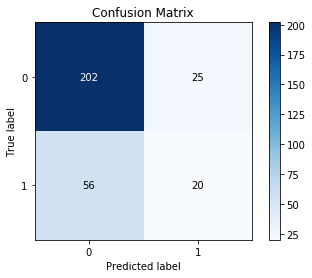

In [24]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)
print("Descision Tree")
print("Accuracy =", clf.best_score_)
plot_cmat(y_test, y_pred)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(fp/(tn+fp+fn+tp),fn/(tn+fp+fn+tp))

0.08250825082508251 0.1848184818481848


0.7755775577557755


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


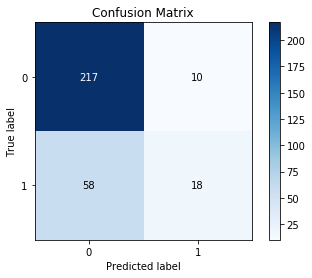

In [26]:
from sklearn import linear_model
lm = linear_model.LogisticRegression()
lm.fit(X_train, y_train.values.ravel())
print(lm.score(X_test, y_test))
y_pred = lm.predict(X_test)
plot_cmat(y_test, y_pred)

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(fp/(tn+fp+fn+tp),fn/(tn+fp+fn+tp))

0.036303630363036306 0.23102310231023102
